In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('event_df_cleaned.csv',index_col='index')
train.tail()

,cost_0,created_dt,end_local_dt,fee_0,id,published_dt,start_local_dt,tax_0,venue_id,created_to_publish,...,subcategory_id_17999.0,subcategory_id_18001.0,subcategory_id_18003.0,subcategory_id_19002.0,subcategory_id_19003.0,subcategory_id_19004.0,subcategory_id_19006.0,subcategory_id_19007.0,subcategory_id_19008.0,waitlist_available_0.0
index,,,,,,,,,,,,,,,,,,,,,
28486,150.0,2019-05-22 13:18:29,2019-06-17 17:00:00,0.0,62255186940,2019-05-22 13:24:07,2019-06-17 08:45:00,0.0,32553467.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28487,0.0,2019-04-28 01:02:25,2019-06-18 05:00:00,0.0,60984042914,2019-04-28 01:02:31,2019-06-17 22:30:00,0.0,20561311.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28488,0.0,2019-05-09 15:39:34,2019-06-17 11:00:00,0.0,61647219493,2019-05-09 16:14:05,2019-06-17 10:00:00,0.0,-999.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28490,0.0,2019-02-07 20:21:27,2019-06-21 12:30:00,0.0,56139579995,2019-02-07 20:24:04,2019-06-17 11:00:00,0.0,13776130.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28492,150.0,2019-03-10 18:01:17,2019-06-16 22:00:00,0.0,58532918535,2019-03-10 19:34:26,2019-03-10 16:00:00,0.0,17981414.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
train[train.columns[pd.Series(train.columns).str.startswith('country_')]].sum()

country_AU       33.0
country_CA      656.0
country_GB      159.0
country_NL       21.0
country_US    24738.0
dtype: float64

In [4]:
print(train.shape)
train = train.loc[train.country_US == 1]
print(train[train.columns[pd.Series(train.columns).str.startswith('country_')]].sum())
train = train.drop(labels=['country_AU','country_CA','country_GB'],axis=1)
print(train.shape)

(25845, 290)
country_AU        0.0
country_CA        0.0
country_GB        0.0
country_NL        0.0
country_US    24738.0
dtype: float64
(24738, 287)


In [5]:
print(train.shape)
train = train.drop(labels=['currency_AUD', 'currency_CAD', 'currency_EUR', 'currency_GBP'],axis=1)
print(train.shape)

(24738, 287)
(24738, 283)


In [6]:
print(train[train.columns[pd.Series(train.columns).str.startswith('refund_policy_')]].sum())

refund_policy_flexible        1473.0
refund_policy_moderate        2537.0
refund_policy_no_refunds      9473.0
refund_policy_not_defined    10676.0
dtype: float64


In [7]:
print(list(train.columns))

['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt', 'start_local_dt', 'tax_0', 'venue_id', 'created_to_publish', 'publish_to_start', 'start_to_end', 'category_id_-999.0', 'category_id_101.0', 'category_id_102.0', 'category_id_103.0', 'category_id_104.0', 'category_id_105.0', 'category_id_106.0', 'category_id_107.0', 'category_id_108.0', 'category_id_109.0', 'category_id_110.0', 'category_id_111.0', 'category_id_112.0', 'category_id_113.0', 'category_id_114.0', 'category_id_115.0', 'category_id_116.0', 'category_id_117.0', 'category_id_118.0', 'category_id_119.0', 'category_id_120.0', 'country_NL', 'country_US', 'currency_PHP', 'donation_0_0.0', 'format_id_-999.0', 'format_id_1.0', 'format_id_2.0', 'format_id_3.0', 'format_id_4.0', 'format_id_5.0', 'format_id_6.0', 'format_id_7.0', 'format_id_8.0', 'format_id_9.0', 'format_id_10.0', 'format_id_11.0', 'format_id_12.0', 'format_id_13.0', 'format_id_14.0', 'format_id_15.0', 'format_id_16.0', 'format_id_17.0', 'format_id

In [8]:
train.columns[:12]

Index(['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt',
       'start_local_dt', 'tax_0', 'venue_id', 'created_to_publish',
       'publish_to_start', 'start_to_end'],
      dtype='object')

In [9]:
print('Benchmark for predicting tip percentage: %.4f' % train.cost_0.std())

Benchmark for predicting tip percentage: 1527.4783


In [10]:
from sklearn.model_selection import train_test_split

train_x = train.drop(labels=['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt',
                             'start_local_dt', 'tax_0', 'venue_id'],axis=1)
train_y = train['cost_0']
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=123)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

scl_model = scaler.fit(X_train.astype('float64'))
X_train_scl = scl_model.transform(X_train.astype('float64'))

l1_cv = LassoCV(cv=5,n_alphas=5)
l1_cv.fit(X_train_scl,y_train)

X_test_scl = scl_model.transform(X_test.astype('float64'))

y_pred_train = l1_cv.predict(X_train)
y_pred = l1_cv.predict(X_test)

print('***Training set***')
print('R squared score: %.4f' % l1_cv.score(X_train_scl,y_train))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred_train,y_train)))


print('\n**Test Set***')
print('R squared score: %.4f' % l1_cv.score(X_test_scl,y_test))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

print('\n\n')
print(pd.DataFrame(list(zip(X_train.columns,l1_cv.coef_)),columns=['feature','coefficient']))

***Training set***
R squared score: 0.0403
RMSE: 8773718.1311

**Test Set***
R squared score: 0.0231
RMSE: 9002506.9352



                    feature  coefficient
0        created_to_publish     0.000000
1          publish_to_start    60.832167
2              start_to_end     2.721136
3        category_id_-999.0     0.000000
4         category_id_101.0     5.740726
..                      ...          ...
269  subcategory_id_19004.0    -0.000000
270  subcategory_id_19006.0    -0.000000
271  subcategory_id_19007.0     0.000000
272  subcategory_id_19008.0    -0.000000
273  waitlist_available_0.0   -49.065420

[274 rows x 2 columns]


Decision Tree

In [12]:
# Make new train and test sets using all features
train_x = train.drop(labels=['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt',
                             'start_local_dt', 'tax_0', 'venue_id'],axis=1)
train_y = train['cost_0']

X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=123)

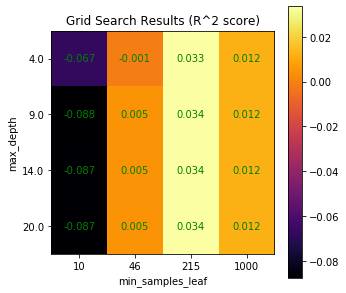

Best parameters:  {'max_depth': 14.0, 'min_samples_leaf': 215}
Train RMSE: 1496.7679
Test RMSE: 1486.6860


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def simple_tree(max_depth,min_samples_leaf):
    parameters={'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}

    # Create and fit decition tree
    dt = DecisionTreeRegressor()
    dt_reg = GridSearchCV(dt, parameters,cv=3)
    dt_reg.fit(X_train,y_train)

    # Plot heat map of R^2 scores
    scores = dt_reg.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_leaf))

    plt.figure(figsize=(5,5))
    plt.imshow(scores,cmap=plt.cm.inferno)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(min_samples_leaf)),min_samples_leaf)
    plt.yticks(np.arange(len(max_depth)),max_depth)
    plt.colorbar()

    for i in range(len(max_depth)):
        for j in range(len(min_samples_leaf)):
            text = plt.text(j, i, scores[i, j].round(3),
                           horizontalalignment="center",
                           verticalalignment="center",
                           color="g")

    plt.title('Grid Search Results (R^2 score)')
    plt.show()


    print('Best parameters: ',dt_reg.best_params_)

    y_pred_train = dt_reg.predict(X_train)
    y_pred = dt_reg.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

# Set values to test in grid search
max_depth = np.floor(np.linspace(4,20,num=4))
min_samples_leaf = list(map(int,np.logspace(1.0,3.0,num=4)))

simple_tree(max_depth,min_samples_leaf)

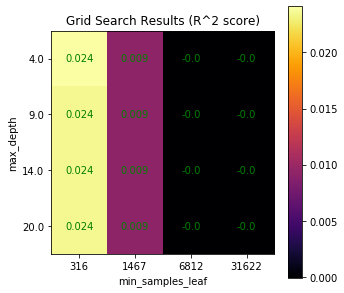

Best parameters:  {'max_depth': 4.0, 'min_samples_leaf': 316}
Train RMSE: 1506.3309
Test RMSE: 1491.4177


In [14]:
max_depth = np.floor(np.linspace(4,20,num=4))
min_samples_leaf = list(map(int,np.logspace(2.5,4.5,num=4)))

simple_tree(max_depth,min_samples_leaf)

Random Forest

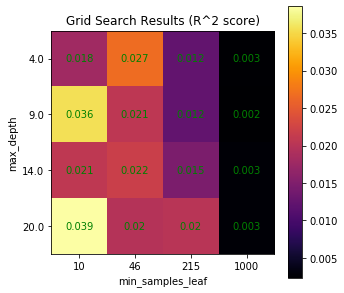

Best parameters:  {'max_depth': 20.0, 'min_samples_leaf': 10}
Train RMSE: 1460.0779
Test RMSE: 1487.7817


In [15]:
from sklearn.ensemble import RandomForestRegressor

def randomforest(max_depth,min_samples_leaf):
    parameters={'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}
    
    # Create and fit random forest
    rf = RandomForestRegressor(n_estimators=10,max_features='sqrt')
    rf = GridSearchCV(rf, parameters,cv=3)
    rf.fit(X_train,y_train)

    scores = rf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_leaf))

    # Plot heatmap of R^2 values
    plt.figure(figsize=(5,5))
    plt.imshow(scores,cmap=plt.cm.inferno)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(min_samples_leaf)),min_samples_leaf)
    plt.yticks(np.arange(len(max_depth)),max_depth)
    plt.colorbar()

    for i in range(len(max_depth)):
        for j in range(len(min_samples_leaf)):
            text = plt.text(j, i, scores[i, j].round(3),
                           horizontalalignment="center",
                           verticalalignment="center",
                           color="g")

    plt.title('Grid Search Results (R^2 score)')
    plt.show()

    print('Best parameters: ',rf.best_params_)

    y_pred_train = rf.predict(X_train)
    y_pred = rf.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

    pd.DataFrame(list(zip(X_train.columns,rf.best_estimator_.feature_importances_)))
    
max_depth = np.floor(np.linspace(4,20,num=4))
min_samples_leaf = list(map(int,np.floor(np.logspace(1.0,3.0,num=4))))

randomforest(max_depth,min_samples_leaf)

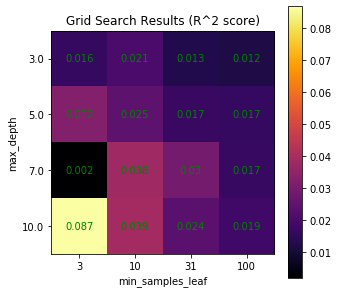

Best parameters:  {'max_depth': 10.0, 'min_samples_leaf': 3}
Train RMSE: 1348.5932
Test RMSE: 1502.0646


In [16]:
max_depth = np.floor(np.linspace(3,10,num=4))
min_samples_leaf = list(map(int,np.floor(np.logspace(0.5,2,num=4))))

randomforest(max_depth,min_samples_leaf)

Gradient boosted trees

Train RMSE: 256.9694
Test RMSE: 1701.4645

Feature Importances
                          0         1
0        created_to_publish  0.172032
1          publish_to_start  0.187991
2              start_to_end  0.027056
3        category_id_-999.0  0.013554
4         category_id_101.0  0.001771
..                      ...       ...
269  subcategory_id_19004.0  0.000000
270  subcategory_id_19006.0  0.000000
271  subcategory_id_19007.0  0.000000
272  subcategory_id_19008.0  0.000000
273  waitlist_available_0.0  0.052330

[274 rows x 2 columns]


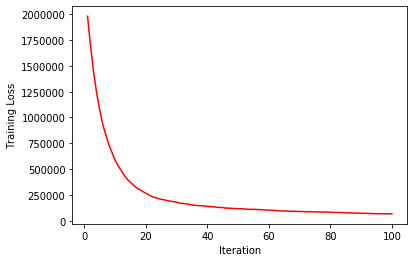

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def gradientBoostedTrees(n_estimators,learning_rate,max_depth):
    gbr=GradientBoostingRegressor(loss='ls', learning_rate=lr, n_estimators=n_est, subsample=1, max_depth =6)
    est=gbr.fit(X_train,y_train)

    #plot the train loss vs. iteration
    n = np.arange(n_est)+1
    plt.plot(n, est.train_score_,'r-')
    plt.ylabel('Training Loss')
    plt.xlabel('Iteration')

    y_pred_train = gbr.predict(X_train)
    y_pred = gbr.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))
    
    print('\nFeature Importances')
    print(pd.DataFrame(list(zip(X_train.columns,gbr.feature_importances_))))

n_est=100
lr=0.1
max_depth=6

gradientBoostedTrees(n_est,lr,max_depth)

## Try just one category | 101: Business & Professional

In [18]:
train = train.loc[train['category_id_101.0']==1]

In [19]:
train.shape

(3747, 283)

In [20]:
train = train[train.columns[~pd.Series(train.columns).str.startswith('category_id_')]]

In [21]:
train.shape

(3747, 262)

In [22]:
train.cost_0.std()

661.8429813298596

In [23]:
from sklearn.model_selection import train_test_split

train_x = train.drop(labels=['cost_0', 'created_dt', 'end_local_dt', 'fee_0', 'id', 'published_dt',
                             'start_local_dt', 'tax_0', 'venue_id'],axis=1)
train_y = train['cost_0']
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=123)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

scl_model = scaler.fit(X_train.astype('float64'))
X_train_scl = scl_model.transform(X_train.astype('float64'))

l1_cv = LassoCV(cv=5,n_alphas=5)
l1_cv.fit(X_train_scl,y_train)

X_test_scl = scl_model.transform(X_test.astype('float64'))

y_pred_train = l1_cv.predict(X_train)
y_pred = l1_cv.predict(X_test)

print('***Training set***')
print('R squared score: %.4f' % l1_cv.score(X_train_scl,y_train))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred_train,y_train)))


print('\n**Test Set***')
print('R squared score: %.4f' % l1_cv.score(X_test_scl,y_test))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

print('\n\n')
print(pd.DataFrame(list(zip(X_train.columns,l1_cv.coef_)),columns=['feature','coefficient']))

***Training set***
R squared score: 0.1207
RMSE: 14259207.8251

**Test Set***
R squared score: 0.0822
RMSE: 12717236.8860



                    feature  coefficient
0        created_to_publish    -0.000000
1          publish_to_start    77.962360
2              start_to_end    -1.092833
3                country_NL     0.000000
4                country_US     0.000000
..                      ...          ...
248  subcategory_id_19004.0     0.000000
249  subcategory_id_19006.0     0.000000
250  subcategory_id_19007.0     0.000000
251  subcategory_id_19008.0     0.000000
252  waitlist_available_0.0   -15.481136

[253 rows x 2 columns]


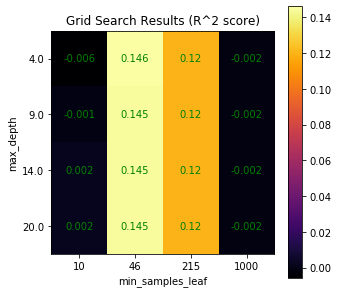

Best parameters:  {'max_depth': 4.0, 'min_samples_leaf': 46}
Train RMSE: 607.9920
Test RMSE: 583.9409


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def simple_tree(max_depth,min_samples_leaf):
    parameters={'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}

    # Create and fit decition tree
    dt = DecisionTreeRegressor()
    dt_reg = GridSearchCV(dt, parameters,cv=3)
    dt_reg.fit(X_train,y_train)

    # Plot heat map of R^2 scores
    scores = dt_reg.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_leaf))

    plt.figure(figsize=(5,5))
    plt.imshow(scores,cmap=plt.cm.inferno)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(min_samples_leaf)),min_samples_leaf)
    plt.yticks(np.arange(len(max_depth)),max_depth)
    plt.colorbar()

    for i in range(len(max_depth)):
        for j in range(len(min_samples_leaf)):
            text = plt.text(j, i, scores[i, j].round(3),
                           horizontalalignment="center",
                           verticalalignment="center",
                           color="g")

    plt.title('Grid Search Results (R^2 score)')
    plt.show()


    print('Best parameters: ',dt_reg.best_params_)

    y_pred_train = dt_reg.predict(X_train)
    y_pred = dt_reg.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

# Set values to test in grid search
max_depth = np.floor(np.linspace(4,20,num=4))
min_samples_leaf = list(map(int,np.logspace(1.0,3.0,num=4)))

simple_tree(max_depth,min_samples_leaf)

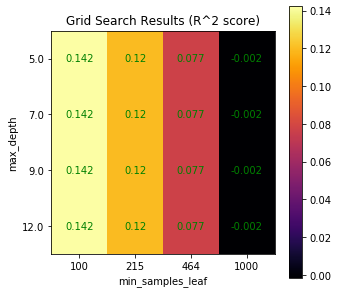

Best parameters:  {'max_depth': 7.0, 'min_samples_leaf': 100}
Train RMSE: 615.6319
Test RMSE: 591.6299


In [26]:
# Set values to test in grid search
max_depth = np.floor(np.linspace(5,12,num=4))
min_samples_leaf = list(map(int,np.logspace(2,3,num=4)))

simple_tree(max_depth,min_samples_leaf)

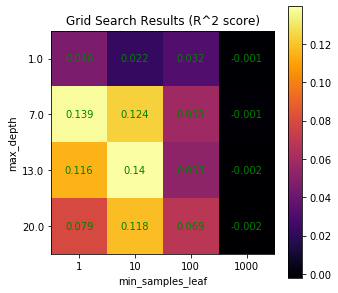

Best parameters:  {'max_depth': 13.0, 'min_samples_leaf': 10}
Train RMSE: 614.9089
Test RMSE: 600.7161
                                         0             1
0                       created_to_publish  5.615996e-02
1                         publish_to_start  1.330664e-01
2                             start_to_end  2.729254e-01
3                               country_NL  0.000000e+00
4                               country_US  0.000000e+00
5                             currency_PHP  0.000000e+00
6                           donation_0_0.0  0.000000e+00
7                         format_id_-999.0  0.000000e+00
8                            format_id_1.0  1.160451e-02
9                            format_id_2.0  1.411634e-03
10                           format_id_3.0  0.000000e+00
11                           format_id_4.0  0.000000e+00
12                           format_id_5.0  1.461734e-02
13                           format_id_6.0  0.000000e+00
14                           format_id_7.0

In [27]:
from sklearn.ensemble import RandomForestRegressor

def randomforest(max_depth,min_samples_leaf):
    parameters={'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}
    
    # Create and fit random forest
    rf = RandomForestRegressor(n_estimators=10,max_features='sqrt')
    rf = GridSearchCV(rf, parameters,cv=3)
    rf.fit(X_train,y_train)

    scores = rf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_leaf))

    # Plot heatmap of R^2 values
    plt.figure(figsize=(5,5))
    plt.imshow(scores,cmap=plt.cm.inferno)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(min_samples_leaf)),min_samples_leaf)
    plt.yticks(np.arange(len(max_depth)),max_depth)
    plt.colorbar()

    for i in range(len(max_depth)):
        for j in range(len(min_samples_leaf)):
            text = plt.text(j, i, scores[i, j].round(3),
                           horizontalalignment="center",
                           verticalalignment="center",
                           color="g")

    plt.title('Grid Search Results (R^2 score)')
    plt.show()

    print('Best parameters: ',rf.best_params_)

    y_pred_train = rf.predict(X_train)
    y_pred = rf.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))

    pd.options.display.max_rows=500
    print(pd.DataFrame(list(zip(X_train.columns,rf.best_estimator_.feature_importances_))))

    return rf.best_estimator_
    
max_depth = np.floor(np.linspace(1,20,num=4))
min_samples_leaf = list(map(int,np.floor(np.logspace(0,3.0,num=4))))

best_rf_estimator = randomforest(max_depth,min_samples_leaf)

Train RMSE: 125.1290
Test RMSE: 621.7228

Feature Importances
                                         0             1
0                       created_to_publish  6.513822e-02
1                         publish_to_start  3.695334e-01
2                             start_to_end  1.508323e-01
3                               country_NL  0.000000e+00
4                               country_US  0.000000e+00
5                             currency_PHP  0.000000e+00
6                           donation_0_0.0  9.000783e-04
7                         format_id_-999.0  1.022442e-04
8                            format_id_1.0  2.066797e-03
9                            format_id_2.0  4.086351e-04
10                           format_id_3.0  2.665225e-04
11                           format_id_4.0  1.109737e-02
12                           format_id_5.0  2.880190e-05
13                           format_id_6.0  0.000000e+00
14                           format_id_7.0  0.000000e+00
15                        

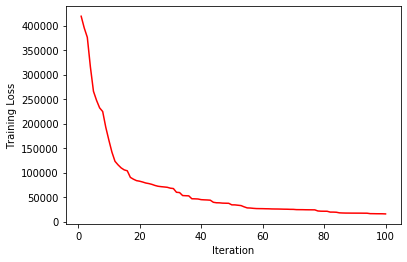

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def gradientBoostedTrees(n_estimators,learning_rate,max_depth):
    gbt=GradientBoostingRegressor(loss='ls', learning_rate=lr, n_estimators=n_est, subsample=1, max_depth =6)
    est=gbt.fit(X_train,y_train)

    #plot the train loss vs. iteration
    n = np.arange(n_est)+1
    plt.plot(n, est.train_score_,'r-')
    plt.ylabel('Training Loss')
    plt.xlabel('Iteration')

    y_pred_train = gbt.predict(X_train)
    y_pred = gbt.predict(X_test)
    print('Train RMSE: %.4f' %np.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('Test RMSE: %.4f' % np.sqrt(mean_squared_error(y_pred,y_test)))
    
    print('\nFeature Importances')
    print(pd.DataFrame(list(zip(X_train.columns,gbt.feature_importances_))))
    
    return gbt

n_est=100
lr=0.1
max_depth=6

gbt = gradientBoostedTrees(n_est,lr,max_depth)

In [29]:
import pickle

pkl_filename = 'RightPrice_RF_model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_rf_estimator, file)

In [30]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

score = pickle_model.score(X_test,y_test)
print(score)
Ypredict = pickle_model.predict(X_test)
print(np.sqrt(mean_squared_error(Ypredict,y_test)))

0.08780200524768533
600.7160949504125


In [55]:
train.loc[train.id==52825744223]

,cost_0,created_dt,end_local_dt,fee_0,id,published_dt,start_local_dt,tax_0,venue_id,created_to_publish,...,subcategory_id_17999.0,subcategory_id_18001.0,subcategory_id_18003.0,subcategory_id_19002.0,subcategory_id_19003.0,subcategory_id_19004.0,subcategory_id_19006.0,subcategory_id_19007.0,subcategory_id_19008.0,waitlist_available_0.0
index,,,,,,,,,,,,,,,,,,,,,
239,0.0,2018-11-19 17:47:44,2019-09-03 14:00:00,0.0,52825744223,2018-11-19 17:49:39,2019-09-03 11:00:00,0.0,21357938.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
pickle_model.predict(train.loc[train.id==52825744223])

ValueError: could not convert string to float: '2018-11-19 17:47:44'